In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import backend as K

In [178]:
train_dir =  'data/train'
test_dir = 'data/test'
val_dir = 'data/val'

## EDA

### Normal Chest

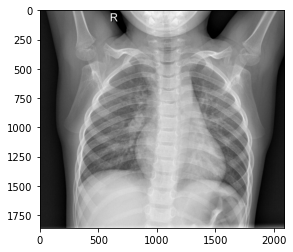

In [179]:
img_normal = load_img('data/train/NORMAL/IM-0115-0001.jpeg')
plt.imshow(img_normal)
plt.show()

In [180]:
data = img_to_array(img_normal)

In [182]:
data.shape

(1858, 2090, 3)

### Pneumonia Chest

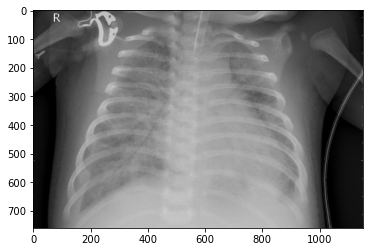

In [93]:
img_pneumonia = load_img('data/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
plt.imshow(img_pneumonia)
plt.show()

In [94]:
img_pneumonia.size

(1152, 760)

### Data for Model Fitting

In [183]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [184]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=16
                                                    )

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                    target_size=(150, 150),
                                                    batch_size=16
                                                    )


test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=16
                                                  )

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Train, val, test all have the 2 classes. This means our problem is binary classification.

## Neural Network

### Baseline Model

In [185]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, 150, 150)
else:
    input_shape = (150, 150, 3)

In [186]:
model = Sequential()

In [187]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(activation = 'relu', units = 128))
model.add(Dense(activation = 'sigmoid', units = 2))

In [188]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 180000)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               23040128  
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 258       
Total params: 23,041,282
Trainable params: 23,041,282
Non-trainable params: 0
_________________________________________________________________


In [189]:
model.compile(optimizer= 'adam',
              loss = 'binary_crossentropy',
             metrics=['accuracy', 'Recall']) 

In [190]:
model1 = model.fit_generator(
    train_generator,
    steps_per_epoch=5216 // 100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=16 // 16)

Epoch 1/10
52/52 [==============================] - 14s 261ms/step - loss: 1.1217 - accuracy: 0.7825 - recall: 0.7861 - val_loss: 0.5139 - val_accuracy: 0.8125 - val_recall: 0.8750
Epoch 2/10
52/52 [==============================] - 12s 233ms/step - loss: 0.2268 - accuracy: 0.9135 - recall: 0.9099 - val_loss: 0.4076 - val_accuracy: 0.8125 - val_recall: 0.8750
Epoch 3/10
52/52 [==============================] - 13s 242ms/step - loss: 0.1544 - accuracy: 0.9399 - recall: 0.9435 - val_loss: 0.3358 - val_accuracy: 0.8750 - val_recall: 0.8125
Epoch 4/10
52/52 [==============================] - 13s 259ms/step - loss: 0.1678 - accuracy: 0.9363 - recall: 0.9363 - val_loss: 0.6646 - val_accuracy: 0.6875 - val_recall: 0.6875
Epoch 5/10
52/52 [==============================] - 15s 286ms/step - loss: 0.1537 - accuracy: 0.9507 - recall: 0.9459 - val_loss: 0.2320 - val_accuracy: 0.9375 - val_recall: 0.9375
Epoch 6/10
52/52 [==============================] - 12s 232ms/step - loss: 0.0859 - accuracy: 0

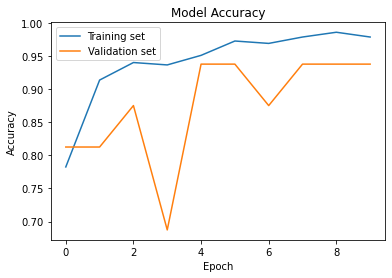

In [191]:
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

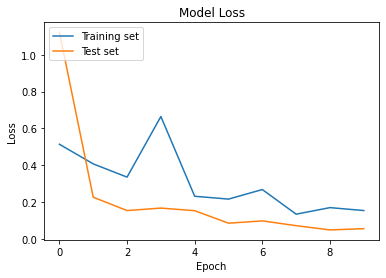

In [192]:
plt.plot(model1.history['val_loss'])
plt.plot(model1.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [193]:
test_accu = model.evaluate(test_generator)

39/39 [==============================] - 7s 175ms/step - loss: 0.9099 - accuracy: 0.7644 - recall: 0.7420


In [194]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 76.44230723381042 %


In [195]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

In [196]:
y_pred.shape

(624,)

In [197]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [198]:
cmat = confusion_matrix(test_generator.classes, y_pred)

In [199]:
cmd = ConfusionMatrixDisplay(cmat, display_labels=['Normal', 'Pneumonia'])

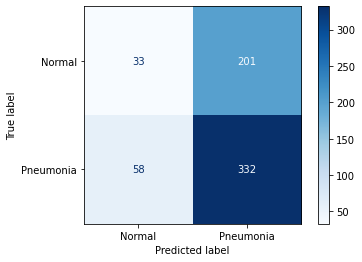

In [200]:
cmd.plot(cmap='Blues')